In [1]:
import psycopg2
#import library pandas
import pandas as pd
#import library sqlio
import pandas.io.sql as sqlio
#create database connection variable 
conn = psycopg2.connect(user="postgres", password="root1234", host="localhost", database="DVDRental")

CASE
* used to form conditional queries
* same as IF/ELSE statement in other programming languages
* Can be used at any place where an expression is used. e.g. SELECT, WHERE, GROUP BY, and HAVING clause.

Syntex:
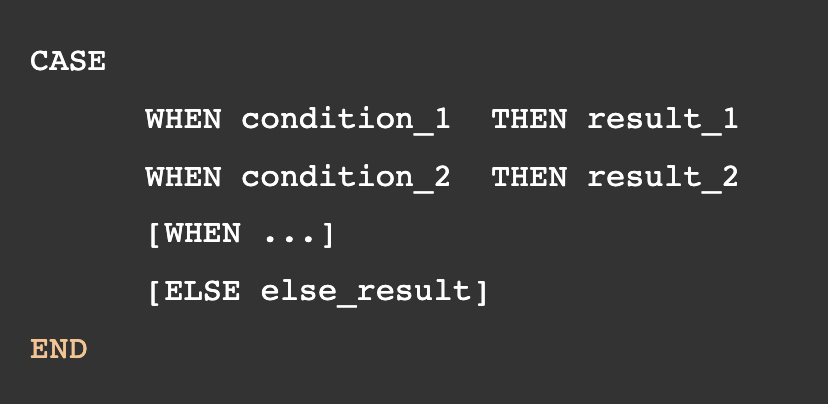

* condition_1, condition_2 is a boolean expression that returns either true or false.
* If a condition evaluates to true, the CASE expression returns the corresponding result that follows the condition.
* For ex. condition_2 evaluates to true, the CASE expression evauates to true and returns the result_2.
* In case all conditions evaluates to false, the CASE expression returns the result (else_result) that follows the ELSE keyword.
* If you omit the ELSE clause, the CASE expression returns NULL.

**Write a query to label the films by their length based on the following logic:**

a) length <= 50, then film is short.

b) 120 >= length > 50, then film is medium.

c) length>120, then film is long.

In [3]:
query = '''SELECT * FROM film
        ORDER BY title;'''
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...
1,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ace':1 'administr':9 'ancient':19 'astound':4...
2,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...
3,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"[Commentaries, Behind the Scenes]",'affair':1 'chase':14 'documentari':5 'fanci':...
4,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,[Deleted Scenes],'african':1 'chef':11 'dentist':14 'documentar...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,[Deleted Scenes],'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"[Trailers, Deleted Scenes]",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [6]:
query = '''SELECT title, length,
           CASE
               WHEN length> 0
                    AND length <= 50 THEN 'Short'
               WHEN length > 50
                    AND length <= 120 THEN 'Medium'
               WHEN length> 120 THEN 'Long'
           END as duration
        FROM film
        ORDER BY title;'''
df = sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
df.head()

,title,length,duration
0,Academy Dinosaur,86,Medium
1,Ace Goldfinger,48,Short
2,Adaptation Holes,50,Short
3,Affair Prejudice,117,Medium
4,African Egg,130,Long


PostgreSQL provides. another form of the CASE expression called simple form.

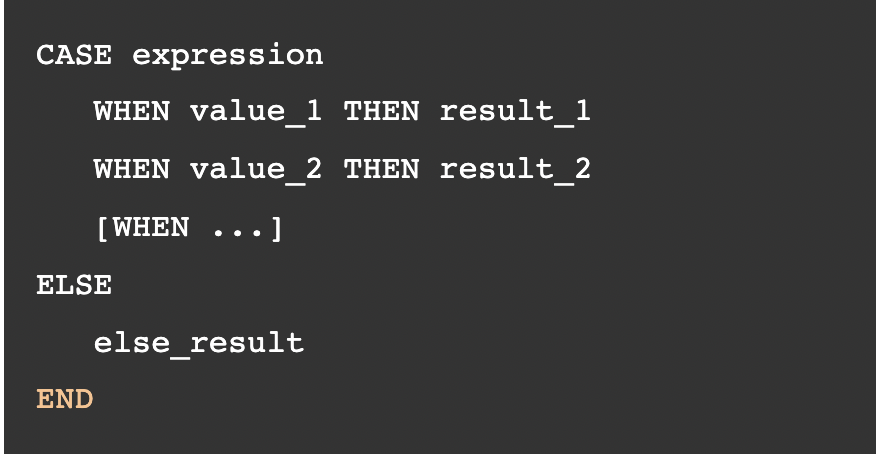

Write a query to add the Rating expression

G:General Audience

PG: Parental Guidance Suggested

PG-13: Parents Strongly Cautioned

R: Restricted

NC-17: Adults Only

In [5]:
query = '''SELECT title, rating,
       CASE rating
           WHEN 'G' THEN 'General Audiences'
           WHEN 'PG' THEN 'Parental Guidance Suggested'
           WHEN 'PG-13' THEN 'Parents Strongly Cautioned'
           WHEN 'R' THEN 'Restricted'
           WHEN 'NC-17' THEN 'Adults Only'
       END
FROM film;'''
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,title,rating,case
0,Chamber Italian,NC-17,Adults Only
1,Grosse Wonderful,R,Restricted
2,Airport Pollock,R,Restricted
3,Bright Encounters,PG-13,Parents Strongly Cautioned
4,Academy Dinosaur,PG,Parental Guidance Suggested
...,...,...,...
995,Young Language,G,General Audiences
996,Youth Kick,NC-17,Adults Only
997,Zhivago Core,NC-17,Adults Only
998,Zoolander Fiction,R,Restricted


##### Aggregate function can be used with CASE expression.

Write a query to calculate the number of films in each rating.

In [10]:
query = '''SELECT
       SUM(CASE rating
             WHEN 'G' THEN 1 
             ELSE 0 
       END) as "General Audiences",
       SUM(CASE rating
             WHEN 'PG' THEN 1 
             ELSE 0 
       END) as "Parental Guidance Suggested",
       SUM(CASE rating
             WHEN 'PG-13' THEN 1 
             ELSE 0 
       END) as "Parents Strongly Cautioned",
       SUM(CASE rating
             WHEN 'R' THEN 1 
             ELSE 0 
         END) "Restricted",
       SUM(CASE rating
             WHEN 'NC-17' THEN 1 
             ELSE 0 
        END) as "Adults Only"
FROM film;'''
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,General Audiences,Parental Guidance Suggested,Parents Strongly Cautioned,Restricted,Adults Only
0,178,194,223,195,210


### Coalesc
* It is a function that returns the first non-null argument.
* used to handle null values effectively.

Syntex:
**COALESCE (argument_1, argument_2, …);**

* accepts unlimited number of arguments.
* returns the first argument that is not null. 
* If all arguments are null, the COALESCE function will return NONE.

It evaluates function from left to right untill it finds the first non-null argument.
All the remaining arguments from the first non-null arguments are not evaluated.

For ex.

In [11]:
query = "SELECT COALESCE(2,5);"

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,coalesce
0,2


In [17]:
query = "SELECT COALESCE(NULL, NULL,NULL);"

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,coalesce
0,None


#### Create a new table.
CREATE TABLE items (
	ID serial PRIMARY KEY,
	product VARCHAR (100) NOT NULL,
	price NUMERIC NOT NULL,
	discount NUMERIC
);
#### Insert value's
INSERT INTO items (product, price, discount)
VALUES
	('A', 1000 ,10),
	('B', 1500 ,20),
	('C', 800 ,5),
	('D', 500, NULL);

In [13]:
query = "SELECT * from items;"

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,product,price,discount
0,1,A,1000.0,10.0
1,2,B,1500.0,20.0
2,3,C,800.0,5.0
3,4,D,500.0,NaN


We have to calculate net_price = price - discount;

In [14]:
query ='''SELECT product, (price-discount) AS net_price
from items;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product,net_price
0,A,990.0
1,B,1480.0
2,C,795.0
3,D,NaN


In [15]:
query = '''SELECT product, (price - COALESCE(discount,0)) AS net_price
        FROM items;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product,net_price
0,A,990.0
1,B,1480.0
2,C,795.0
3,D,500.0


The above query can be returned using CASE statement also

In [16]:
query = '''SELECT product,
    (price - CASE
        WHEN discount IS NULL THEN
            0
        ELSE
            discount
    END) AS net_price
    FROM items;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,product,net_price
0,A,990.0
1,B,1480.0
2,C,795.0
3,D,500.0


COALESCE function and CASE expression are the same.
However, COALESCE function makes the query shorter and easier to read.

**ISNULL:** SQL Server supports ISNULL function that replaces NULL with a specified replacement value.

Syntex:
ISNULL(expression, replacement)

if expression is NULL, then the ISNULL function returns the replacement. Otherwise, it returns the result of the expression.

#### PostgreSQL does not have ISNULL expression.

COALESCE(expression,replacement) is equivalent to ISNULL function of MySQL.

In [18]:
query = """SELECT furniture_name, SUM(furniture_price)
            FROM furniture
            GROUP BY ROLLUP (furniture_name);"""

sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,furniture_name,sum
0,None,49500
1,Table,9000
2,Bed,28000
3,Chair,4500
4,Sofa,8000


In [19]:
query = """SELECT COALESCE(furniture_name, 'Total furniture price') AS furniture_name,
          SUM(furniture_price)FROM furniture
          GROUP BY ROLLUP (furniture_name);"""
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,furniture_name,sum
0,Total furniture price,49500
1,Table,9000
2,Bed,28000
3,Chair,4500
4,Sofa,8000


#### NULLIF:
* used to handle null values.

Syntex:
NULLIF(argument_1,argument_2);

NULLIF function returns a NULL value if argument_1 equals to argument_2, otherwise it returns argument_1.

NULLIF() function is a special case of CASE statements

CASE WHEN first_expression = second_expression<br>
THEN NULL <br>
ELSE <br>
first_expression <br>
END;

In [22]:
query1 = '''SELECT NULLIF (1, 1);'''

query2 = '''SELECT NULLIF (1, 0);'''

query3 = '''SELECT NULLIF ('A', 'B');'''

#execute query and save it to a variable
sqlio.read_sql_query(query3,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,nullif
0,A


##### Create a new table- sales
CREATE TABLE sales_target
(
salesperson_id integer NOT NULL,
salesperson character varying(255) NOT NULL,
store_state character varying(255) NOT NULL,
sales_target numeric NOT NULL,
sales_current numeric NOT NULL
);

#### Insert some values into sales table.
INSERT INTO sales_target
(salesperson_id ,salesperson ,store_state ,sales_target ,sales_current)
VALUES
(101,'Danish K','KA',10000,10000),
(102,'Rashmi Sharma','DL',23000,18000),
(103,'Mohak Patel','MH',21000,21000),
(104,'Devika Ramaswamy','TN',10000,8000),
(105,'Reema Ray','WB',0,10000);

In [23]:
query = '''SELECT * FROM sales_target;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salesperson_id,salesperson,store_state,sales_target,sales_current
0,101,Danish K,KA,10000.0,10000.0
1,102,Rashmi Sharma,DL,23000.0,18000.0
2,103,Mohak Patel,MH,21000.0,21000.0
3,104,Devika Ramaswamy,TN,10000.0,8000.0
4,105,Reema Ray,WB,0.0,10000.0


Write a query to return sales target of a salesperson who has not achieved his or her target.

In [24]:
query = '''SELECT salesperson, 
           NULLIF(sales_target,sales_current) as target_to_be_achieved
           FROM sales_target;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salesperson,target_to_be_achieved
0,Danish K,NaN
1,Rashmi Sharma,23000.0
2,Mohak Patel,NaN
3,Devika Ramaswamy,10000.0
4,Reema Ray,0.0


Write a query to return average sales target for the salesperson who has not achieved their sales target.

In [25]:
query = '''SELECT salesperson, 
           COALESCE(NULLIF(sales_target,sales_current),0.0) as target_to_be_achieved
           FROM sales_target;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salesperson,target_to_be_achieved
0,Danish K,0.0
1,Rashmi Sharma,23000.0
2,Mohak Patel,0.0
3,Devika Ramaswamy,10000.0
4,Reema Ray,0.0


In [26]:
query = '''SELECT AVG(COALESCE(NULLIF(sales_target,sales_current),0.0)) as target_to_be_achieved
           FROM sales_target;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,target_to_be_achieved
0,6600.0


Write an SQL query to return the remaining sales target for each salesperson

In [27]:
query = '''SELECT salesperson, 
           (COALESCE(NULLIF(sales_target,sales_current),sales_target)-sales_current) as target_to_be_achieved
           FROM sales_target;'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,salesperson,target_to_be_achieved
0,Danish K,0.0
1,Rashmi Sharma,5000.0
2,Mohak Patel,0.0
3,Devika Ramaswamy,2000.0
4,Reema Ray,-10000.0


NULLIF is a flow control function that takes two arguments and examines if the given two arguments are equal or not. If they are equal, it returns NULL value of data type similar to the first argument otherwise returns the first expression.

#### CAST:
* Used to convert a value of one type to another.

Syntex of type CAST:<br>
CAST(expression AS target_type);

Here, expression can be a constant, a table column, an expression that evaluates to a value.

target data type: which you want to convert the result of the expression.

##### Another way:
    expression::type <br>
    
For ex:  <br>
SELECT <br>
  '100'::INTEGER, <br>
  '01-OCT-2015'::DATE;
  
The above method is PostgreSQL specific and does not conform to the SQL statndard.

Write a query to CAST a string as an integer.

In [28]:
query = '''SELECT CAST('100' AS INTEGER);'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,int4
0,100


or Convert a string to a date

In [29]:
query = '''SELECT
               CAST ('2022-02-11' AS DATE),
               CAST ('11-FEB-2015' AS DATE);'''

#execute query and save it to a variable
sqlio.read_sql_query(query,conn)

/Users/abhishek/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,date,date
0,2022-02-11,2015-02-11
